In [258]:
import pandas as pd
import datetime

In [259]:
import numpy as np
class timeSeries:
    def __init__(self,time,x,y,z,flag=-1):
        self.t = time
        self.x = x
        self.y = y
        self.z = z
        self.f = flag
        self.l = len(time)
        self.i = np.array([ (x**2+y**2+z**2)**(1/2) for x,y,z in zip(self.x,self.y,self.z)])

猫背のときの記録

In [260]:
!head output20190608180459.112.txt

19700101235959.999	0.000000	0.000000	0.000000	1
20190608180506.666	1.403970	1.907882	9.906566	1
20190608180506.710	1.337411	2.211562	9.427601	1
20190608180506.712	0.123857	2.096373	8.847954	1
20190608180506.716	0.652908	1.152712	9.260486	1
20190608180506.734	1.724007	1.188750	10.681224	1
20190608180506.756	2.002175	1.953860	12.953416	1
20190608180506.778	1.337238	2.047876	14.454236	1
20190608180506.803	0.800918	0.638141	13.683571	1
20190608180506.820	0.446547	0.666220	10.248064	1


猫背でないときの記録

In [261]:
!head output20190608180934.921.txt

19700101235959.999	0.000000	0.000000	0.000000	1
20190608180938.805	-0.236767	4.319973	8.542282	0
20190608180938.844	-2.559229	3.829372	7.841308	0
20190608180938.846	-3.178092	4.253060	8.925909	0
20190608180938.855	-2.160355	3.712545	9.651180	0
20190608180938.875	-2.528038	3.727964	8.793855	0
20190608180938.894	-2.379195	3.440554	7.907368	0
20190608180938.915	-2.001304	3.099916	8.414460	0
20190608180938.934	-1.050911	2.964118	9.096760	0
20190608180938.954	-0.111809	2.424177	9.501448	0


In [263]:
nekoze_filenames= ["output20190608180459.112.txt","output20190608181403.389.txt"]
inuze_filenames = ["output20190608180934.921.txt","output20190608181845.651.txt"]
test_filename = "output_test.txt"

読み込んで前処理

In [264]:
inuze = []
for filename in inuze_filenames:
    with open(filename) as f:
        inuze +=f.readlines()[300:-300]

In [265]:
nekoze = []
for filename in nekoze_filenames:
    with open(filename) as f:
        nekoze += f.readlines()[300:-300]

データの形式の確認

In [266]:
inuze[0].split("\t")

['20190608180944.775', '-3.538190', '-16.845890', '-0.190799', '0\n']

In [267]:
def convert (x) :
    return list(map(int,(x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14],int(x[15:])*1000)))

In [268]:
def deltaSeconds(string):
    t = datetime.datetime(*convert(string))
    return (t-datetime.datetime(1970,1,1)).total_seconds()

データフレームへの格納

In [323]:
whole_df = pd.DataFrame(
    [ (lambda line : 
       (*line.rstrip().split("\t"),deltaSeconds(line.split("\t")[0])-deltaSeconds(nekoze[0].split("\t")[0])))(line) 
     for line in inuze+nekoze ],columns=["Time","X","Y","Z","Flag","DeltaSec"])
whole_df = whole_df.sort_values("DeltaSec")

In [269]:
df_inuze = pd.DataFrame(
    [ (lambda line : 
       (*line.rstrip().split("\t"),deltaSeconds(line.split("\t")[0])-deltaSeconds(inuze[0].split("\t")[0])))(line) 
     for line in inuze],columns=["Time","X","Y","Z","Flag","DeltaSec"])
df_inuze.head()

,Time,X,Y,Z,Flag,DeltaSec
0,20190608180944.775,-3.538190,-16.845890,-0.190799,0,0.00
1,20190608180944.795,-3.471583,-14.463593,0.251276,0,0.02
2,20190608180944.815,-0.764191,-13.425774,0.293491,0,0.04
3,20190608180944.835,-0.092962,-12.401525,2.526726,0,0.06
4,20190608180944.855,0.086977,-8.836693,0.659239,0,0.08


In [270]:
df_inuze.tail()

,Time,X,Y,Z,Flag,DeltaSec
23820,20190608182302.935,3.184892,-11.532075,1.517972,0,798.16
23821,20190608182302.955,1.395437,-13.529289,3.045606,0,798.18
23822,20190608182302.975,2.236184,-14.733908,2.716835,0,798.20
23823,20190608182302.995,1.987283,-13.970234,3.022048,0,798.22
23824,20190608182303.015,1.365241,-13.390253,2.909769,0,798.24


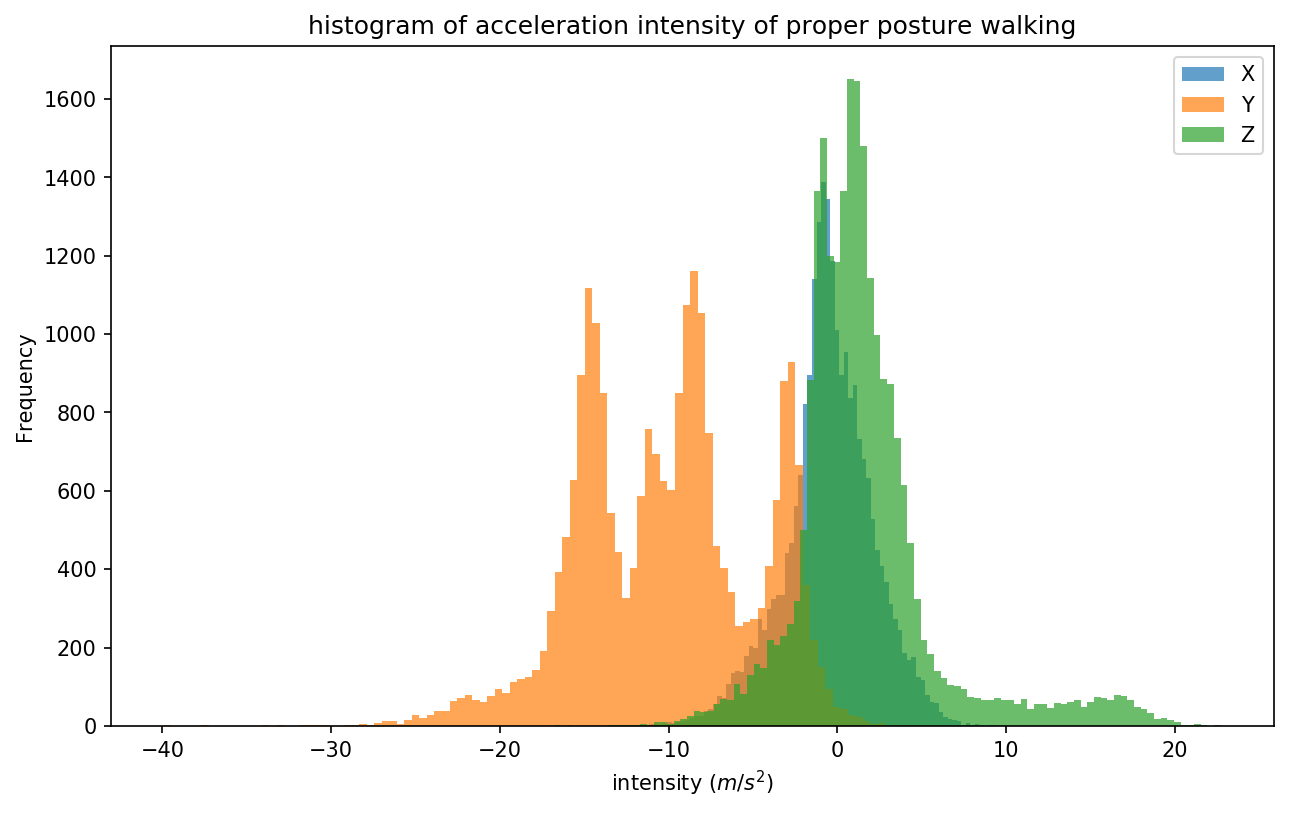

In [312]:
plt.figure(figsize=(10,6),dpi=150)
pd.Series(map(float,df_inuze.X)).plot.hist(100,alpha=0.7,label="X")
pd.Series(map(float,df_inuze.Y)).plot.hist(100,alpha=0.7,label="Y")
pd.Series(map(float,df_inuze.Z)).plot.hist(100,alpha=0.7,label="Z")
plt.xlabel("intensity ($m/s^2$)")
plt.title("histogram of acceleration intensity of proper posture walking")
plt.legend()
plt.show()

In [271]:
df_nekoze = pd.DataFrame(
    [ (lambda line : 
       (*line.rstrip().split("\t"),deltaSeconds(line.split("\t")[0])-deltaSeconds(nekoze[0].split("\t")[0])))(line) 
     for line in nekoze],columns=["Time","X","Y","Z","Flag","DeltaSec"])
df_nekoze.head()

,Time,X,Y,Z,Flag,DeltaSec
0,20190608180512.615,-0.522233,-15.475142,-3.645775,1,0.000
1,20190608180512.635,-1.337736,-16.749346,-3.708570,1,0.020
2,20190608180512.655,-1.005555,-15.611181,-0.982398,1,0.040
3,20190608180512.675,-2.416554,-14.583217,1.241576,1,0.060
4,20190608180512.696,-3.980772,-14.741502,0.233205,1,0.081


In [272]:
df_nekoze.tail()

,Time,X,Y,Z,Flag,DeltaSec
23820,20190608181820.875,1.646483,-10.293420,-0.808445,1,788.260
23821,20190608181820.897,-1.469207,-6.537081,-0.571065,1,788.282
23822,20190608181820.915,-0.538829,-3.770216,-0.390609,1,788.300
23823,20190608181820.935,-1.637155,-2.623068,-0.787807,1,788.320
23824,20190608181820.955,-2.160480,-2.954617,-0.816413,1,788.340


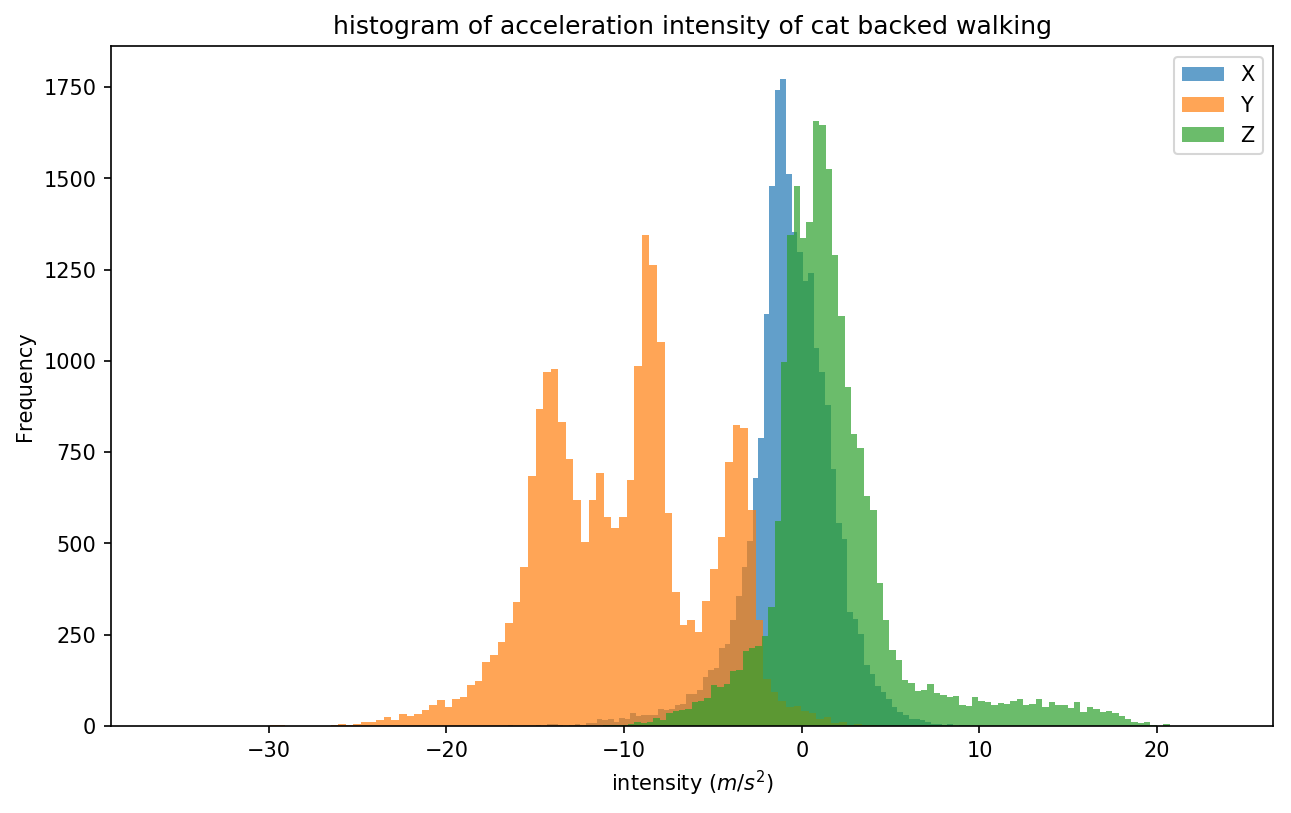

In [311]:
plt.figure(figsize=(10,6),dpi=150)
pd.Series(map(float,df_nekoze.X)).plot.hist(100,alpha=0.7,label="X")
pd.Series(map(float,df_nekoze.Y)).plot.hist(100,alpha=0.7,label="Y")
pd.Series(map(float,df_nekoze.Z)).plot.hist(100,alpha=0.7,label="Z")
plt.xlabel("intensity ($m/s^2$)")
plt.title("histogram of acceleration intensity of cat backed walking")
plt.legend()
plt.show()

In [273]:
from matplotlib import pyplot as plt 

猫背のデータのプロット

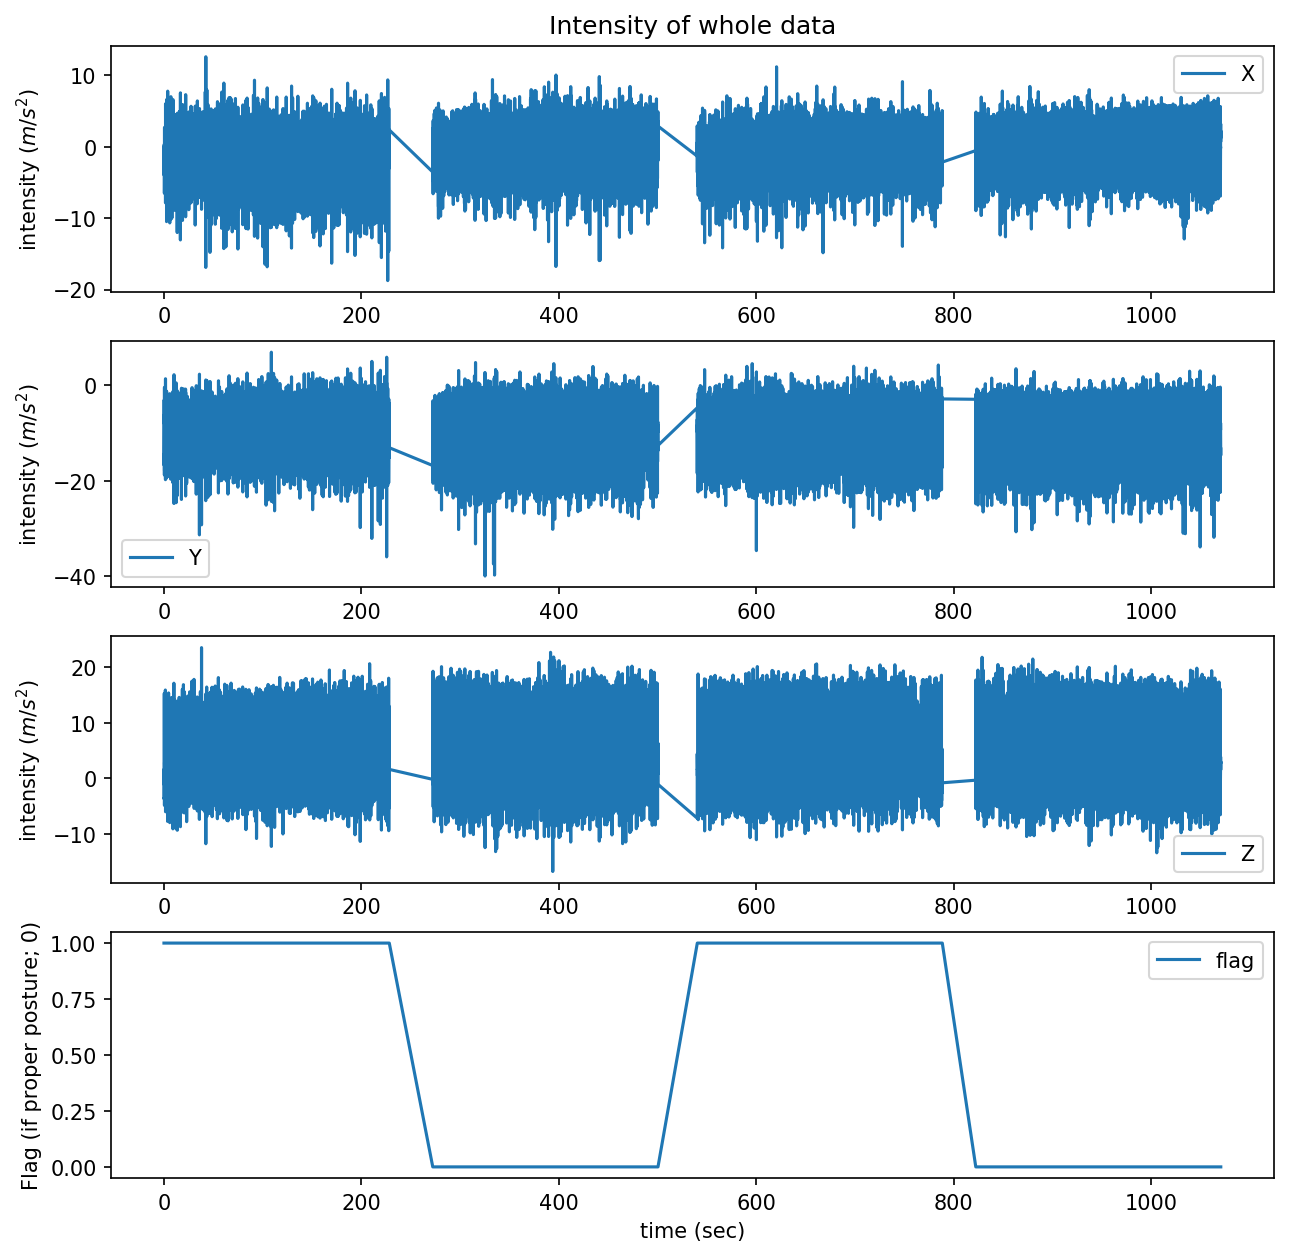

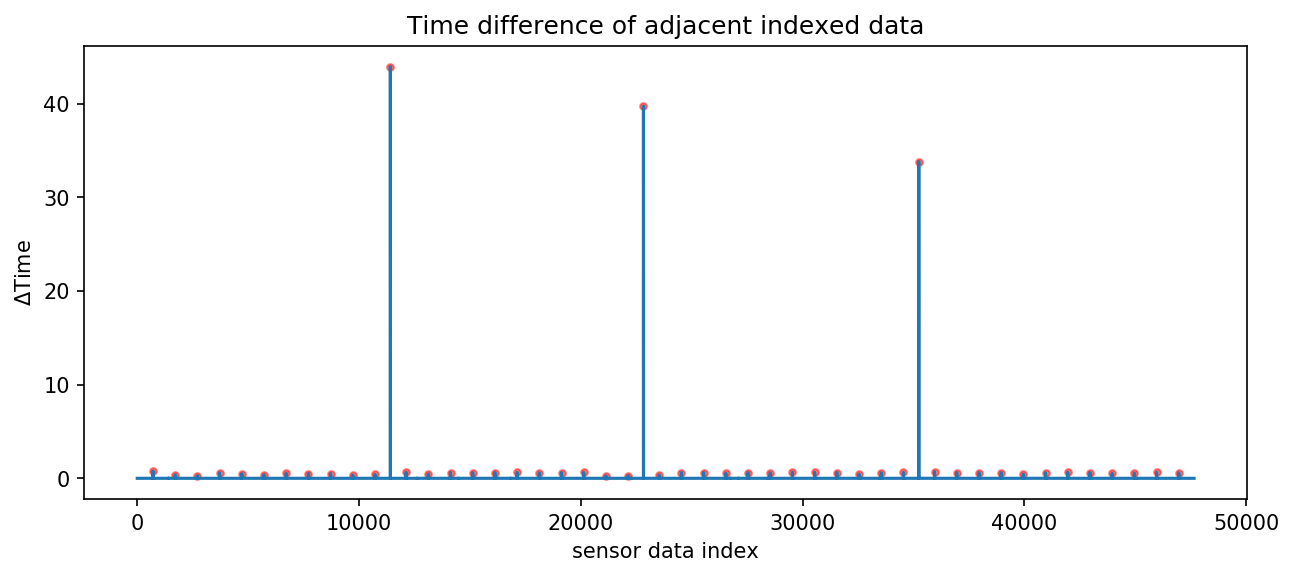

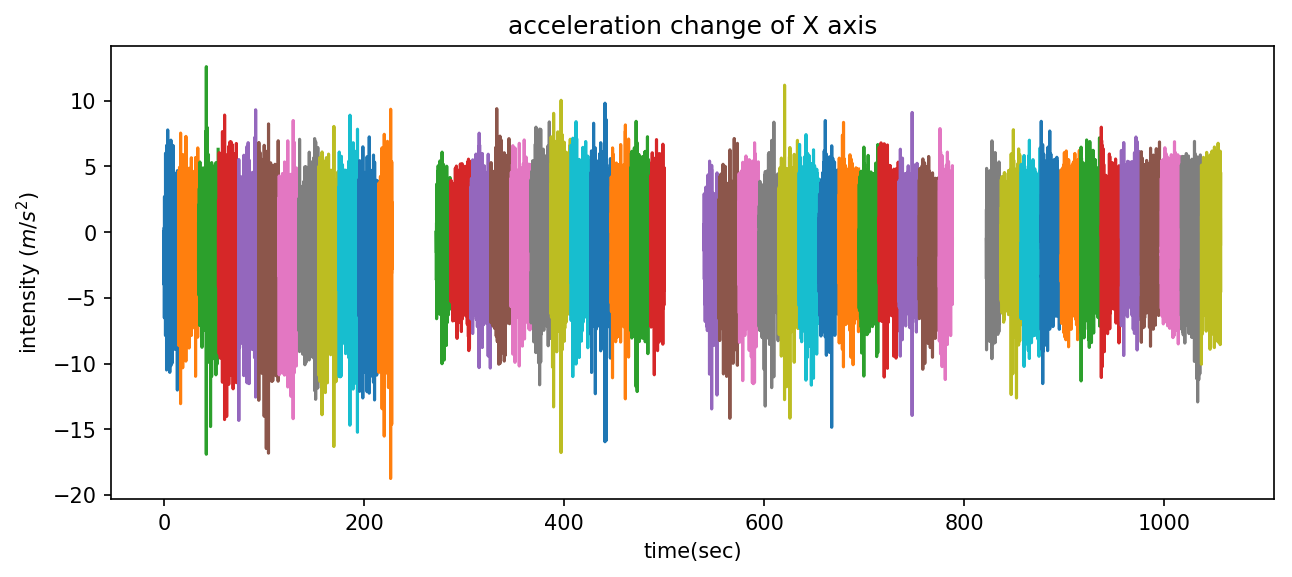

In [366]:
plt.figure(dpi=150,figsize=(10,10))

plt.title("Intensity of whole data")
sl = slice(whole_df.size)
nt = whole_df.DeltaSec.to_numpy().astype(float)[sl]
nf = whole_df.Flag.to_numpy().astype(int)[sl]
nx = whole_df.X.to_numpy().astype(float)[sl]
ny = whole_df.Y.to_numpy().astype(float)[sl]
nz = whole_df.Z.to_numpy().astype(float)[sl]
plt.subplot(4, 1, 1)

plt.title("Intensity of whole data")
plt.plot(nt,nx,label="X")
plt.ylabel("intensity ($m/s^2$)")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(nt,ny,label="Y")
plt.ylabel("intensity ($m/s^2$)")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(nt,nz,label="Z")
plt.ylabel("intensity ($m/s^2$)")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(nt,nf,label="flag")
plt.legend()
plt.ylabel("Flag (if proper posture; 0)")
plt.xlabel("time (sec)")

plt.show()

plt.figure(dpi=150,figsize=(10,4))

threshold = 0.2

idx = [ i-1  for i in range(len(nt)-1)  if nt[i+1]-nt[i]>threshold]
numbers = [ nt[i+1]-nt[i]  for i in range(len(nt)-1)  if nt[i+1]-nt[i]>threshold]

plt.scatter(idx,numbers,color="r",alpha=0.5,s=10)

plt.plot([ nt[i+1]-nt[i]  for i in range(len(nt)-1)])

plt.xlabel("sensor data index")
plt.ylabel("$\Delta$Time")
plt.title("Time difference of adjacent indexed data")
plt.show()


plt.figure(figsize=(10,4),dpi=150)
jdx = [0]+idx
n_data = []
for j in range(min(len(idx),1e9)):
    sl = slice( jdx[j]+2 ,jdx[j+1]   )
    if len(nt[sl])<100:
        continue
    plt.plot(nt[sl],nx[sl])
    n_data += [ timeSeries(nt[sl],nx[sl],ny[sl],nz[sl],nf[sl])   ]
    #y = np.abs(fft(nx[sl]/(len(nx[sl])/2)) )
    #plt.plot(y[:len(y)//2])
    #plt.show()
plt.xlabel("time(sec)")
plt.ylabel("intensity ($m/s^2$)")
plt.title("acceleration change of X axis")
plt.show()

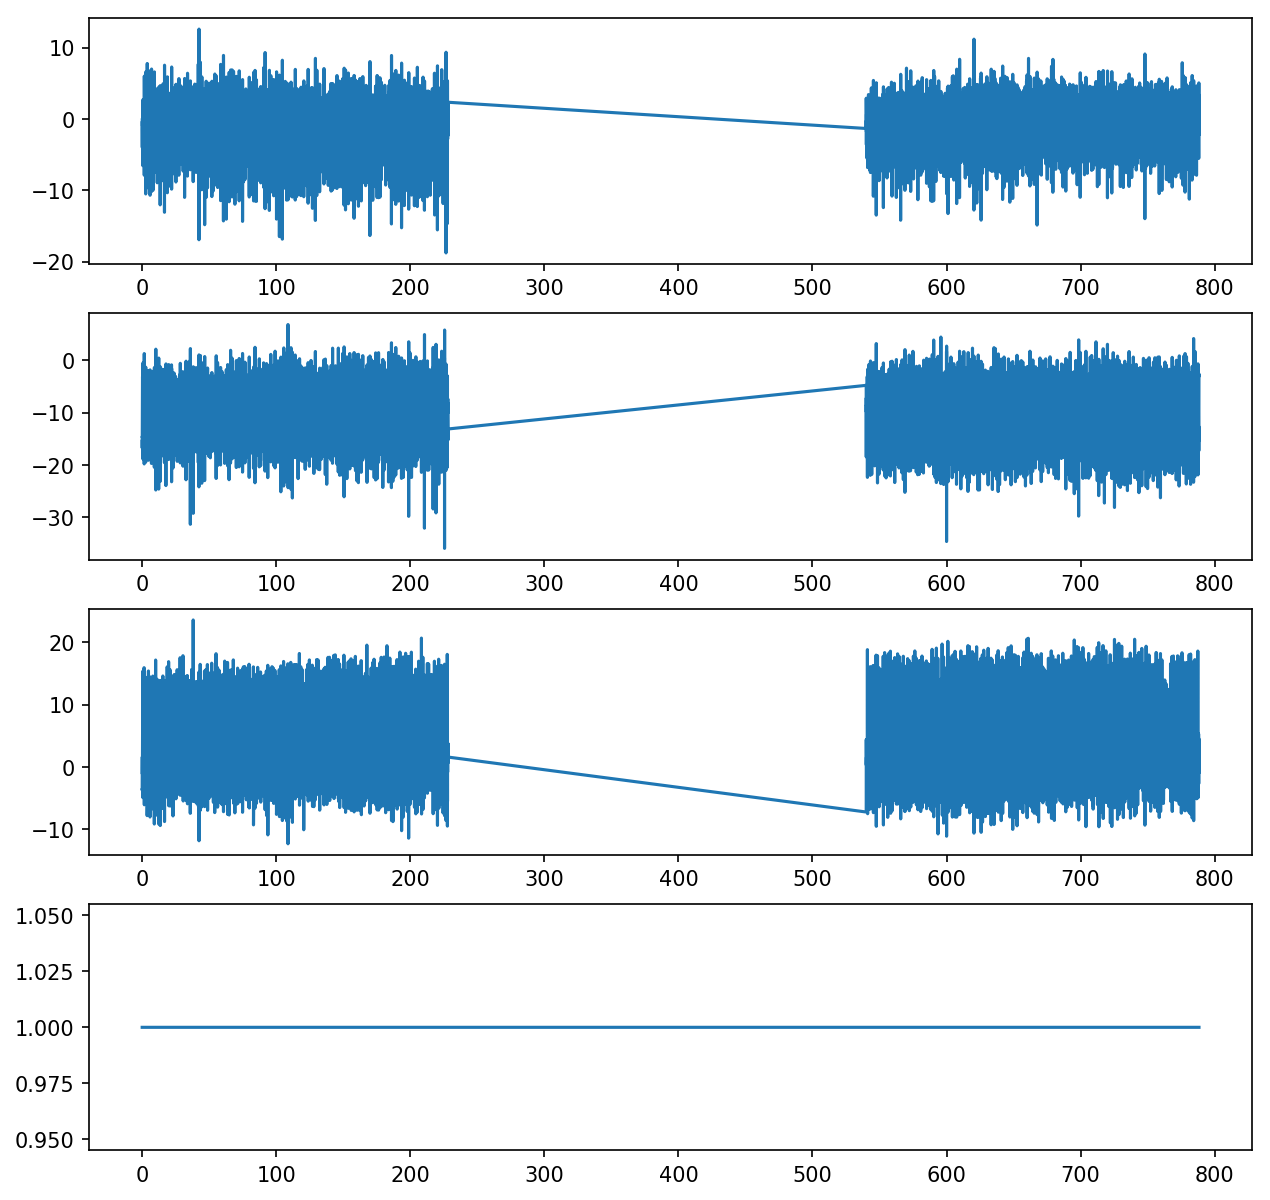

In [367]:
plt.figure(dpi=150,figsize=(10,10))
sl = slice(df_nekoze.size)
nt = df_nekoze.DeltaSec.to_numpy().astype(float)[sl]
nf = df_nekoze.Flag.to_numpy().astype(int)[sl]
nx = df_nekoze.X.to_numpy().astype(float)[sl]
ny = df_nekoze.Y.to_numpy().astype(float)[sl]
nz = df_nekoze.Z.to_numpy().astype(float)[sl]
plt.subplot(4, 1, 1)
plt.plot(nt,nx)
plt.subplot(4, 1, 2)
plt.plot(nt,ny)

plt.subplot(4, 1, 3)
plt.plot(nt,nz)

plt.subplot(4, 1, 4)
plt.plot(nt,nf)
plt.show()

必要ないデータの除去

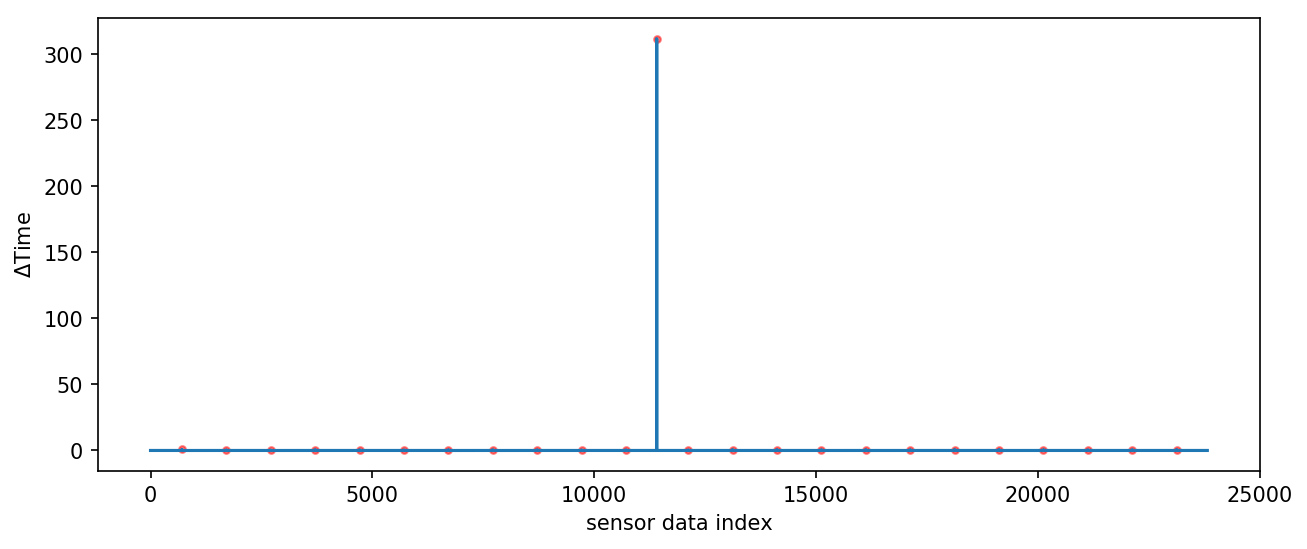

In [368]:
plt.figure(dpi=150,figsize=(10,4))

threshold = 0.2

idx = [ i-1  for i in range(len(nt)-1)  if nt[i+1]-nt[i]>threshold]
numbers = [ nt[i+1]-nt[i]  for i in range(len(nt)-1)  if nt[i+1]-nt[i]>threshold]

plt.scatter(idx,numbers,color="r",alpha=0.5,s=10)

plt.plot([ nt[i+1]-nt[i]  for i in range(len(nt)-1)])

plt.xlabel("sensor data index")
plt.ylabel("$\Delta$Time")
plt.show()

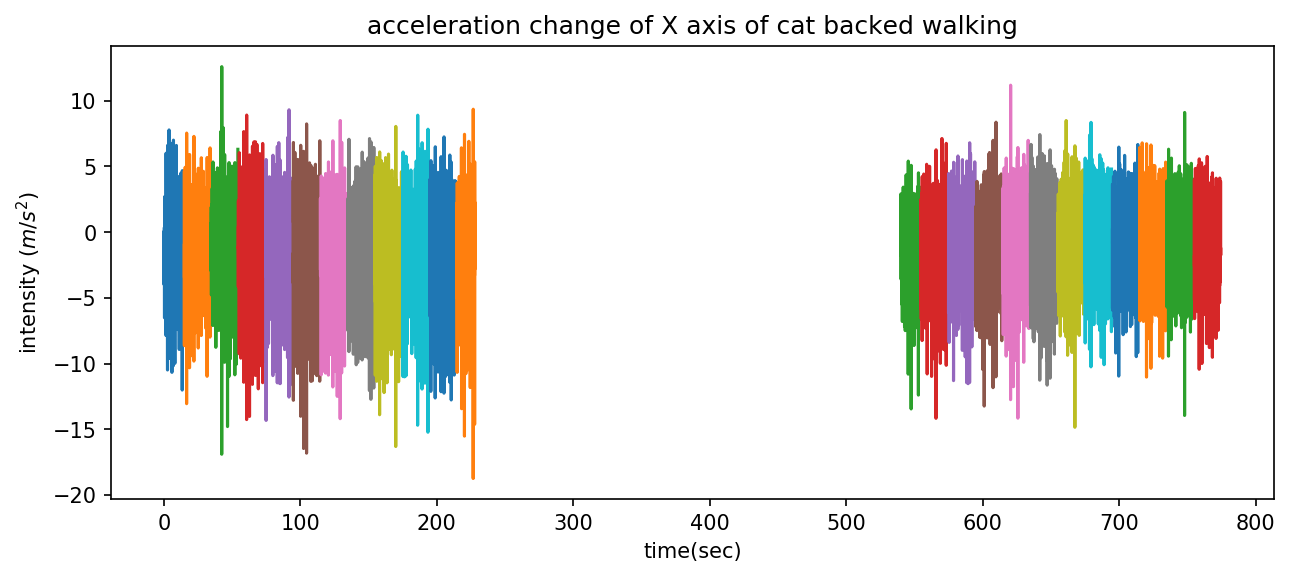

In [369]:
plt.figure(figsize=(10,4),dpi=150)
jdx = [0]+idx
n_data = []
for j in range(min(len(idx),1e9)):
    sl = slice( jdx[j]+2 ,jdx[j+1]   )
    if len(nt[sl])<100:
        continue
    plt.plot(nt[sl],nx[sl])
    n_data += [ timeSeries(nt[sl],nx[sl],ny[sl],nz[sl],nf[sl])   ]
    #y = np.abs(fft(nx[sl]/(len(nx[sl])/2)) )
    #plt.plot(y[:len(y)//2])
    #plt.show()
plt.xlabel("time(sec)")
plt.ylabel("intensity ($m/s^2$)")
plt.title("acceleration change of X axis of cat backed walking")
plt.show()

時間に隙間が空いていて記録されていないところを排除する

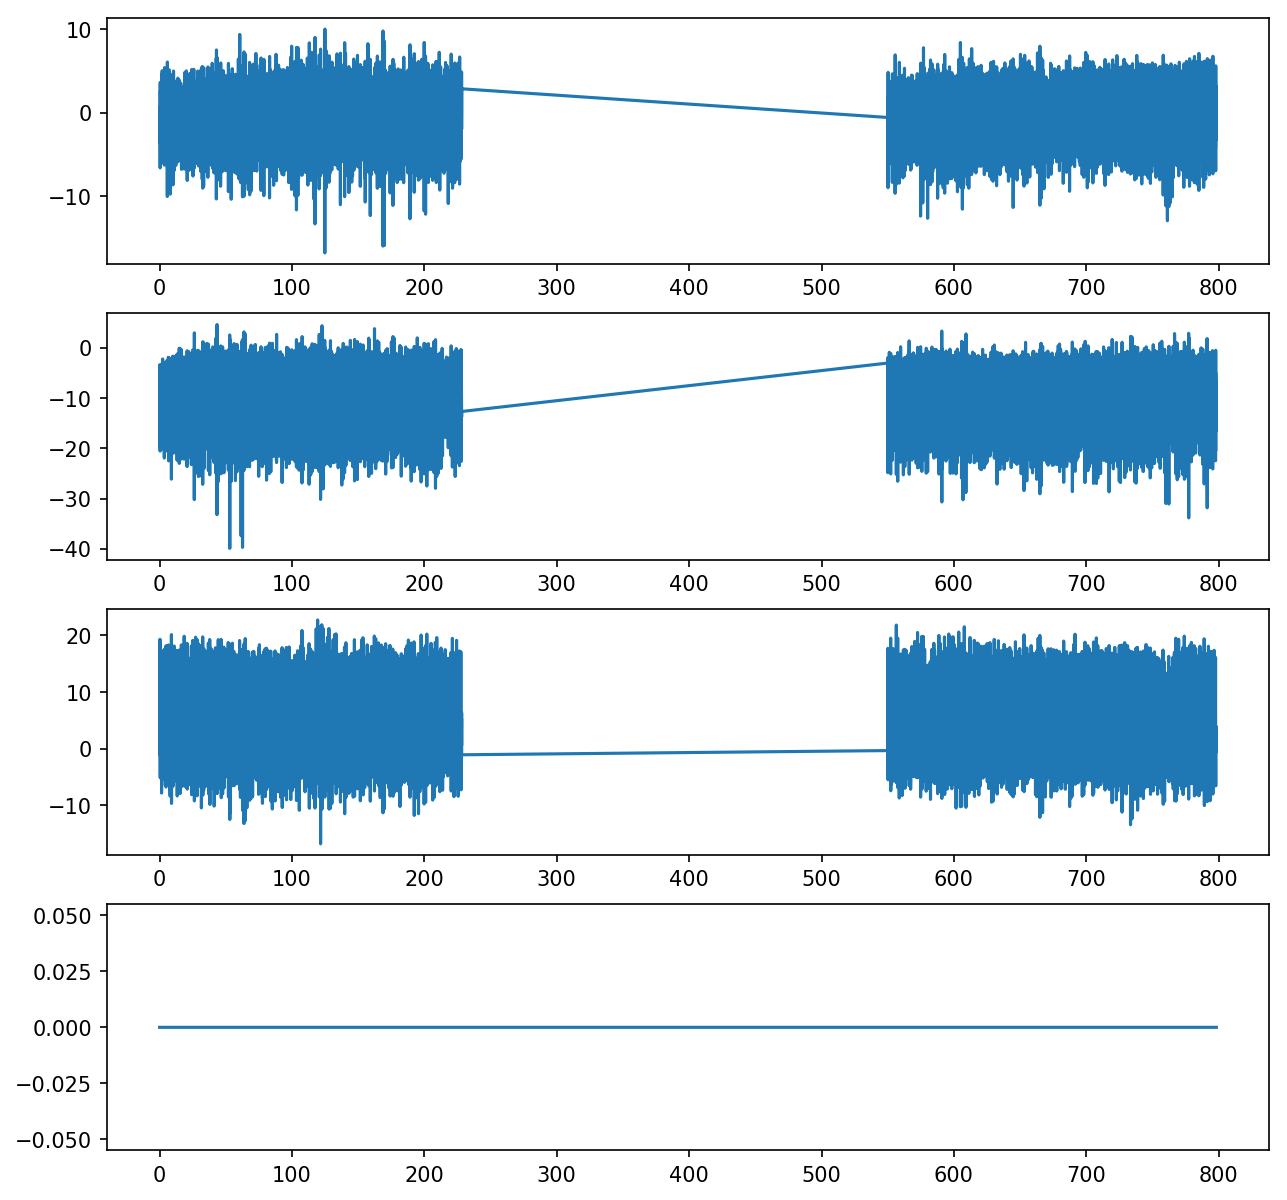

In [370]:
plt.figure(dpi=150,figsize=(10,10))
sl = slice(df_inuze.size)
i_t = df_inuze.DeltaSec.to_numpy().astype(float)[sl]
i_f = df_inuze.Flag.to_numpy().astype(int)[sl]
i_x = df_inuze.X.to_numpy().astype(float)[sl]
i_y = df_inuze.Y.to_numpy().astype(float)[sl]
i_z = df_inuze.Z.to_numpy().astype(float)[sl]
plt.subplot(4, 1, 1)
plt.plot(i_t,i_x)
plt.subplot(4, 1, 2)
plt.plot(i_t,i_y)

plt.subplot(4, 1, 3)
plt.plot(i_t,i_z)

plt.subplot(4, 1, 4)
plt.plot(i_t,i_f)
plt.show()

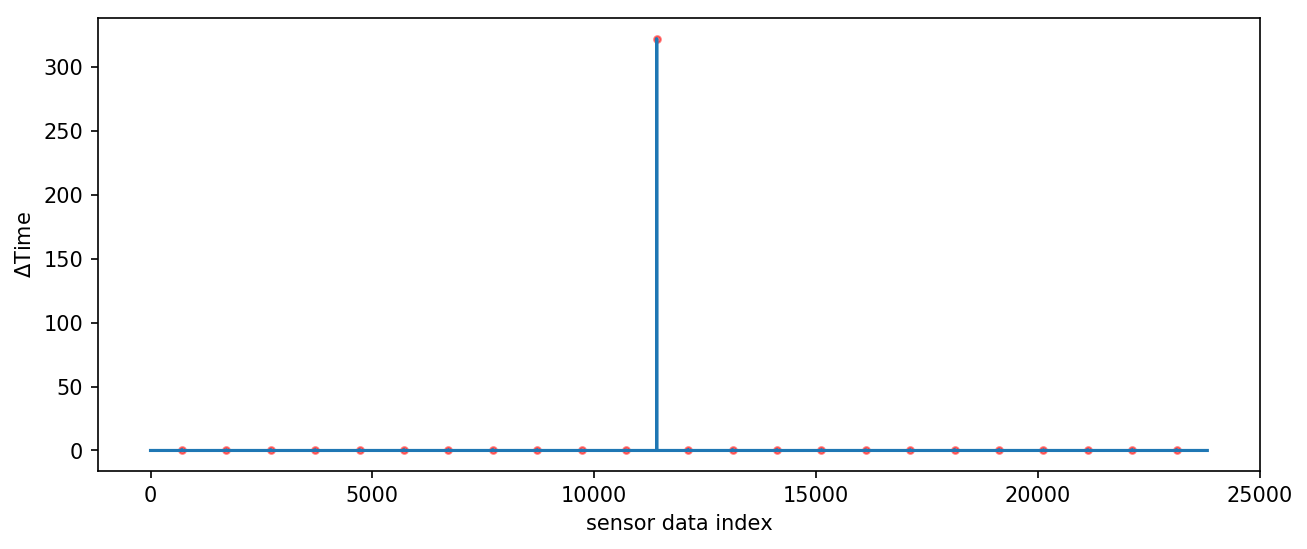

In [371]:
plt.figure(dpi=150,figsize=(10,4))

threshold = 0.2

idx = [ i-1  for i in range(len(i_t)-1)  if i_t[i+1]-i_t[i]>threshold]
numbers = [ i_t[i+1]-i_t[i]  for i in range(len(i_t)-1)  if i_t[i+1]-i_t[i]>threshold]

plt.scatter(idx,numbers,color="r",alpha=0.5,s=10)
plt.plot([ i_t[i+1]-i_t[i]  for i in range(len(i_t)-1)])
plt.xlabel("sensor data index")
plt.ylabel("$\Delta$Time")
plt.show()

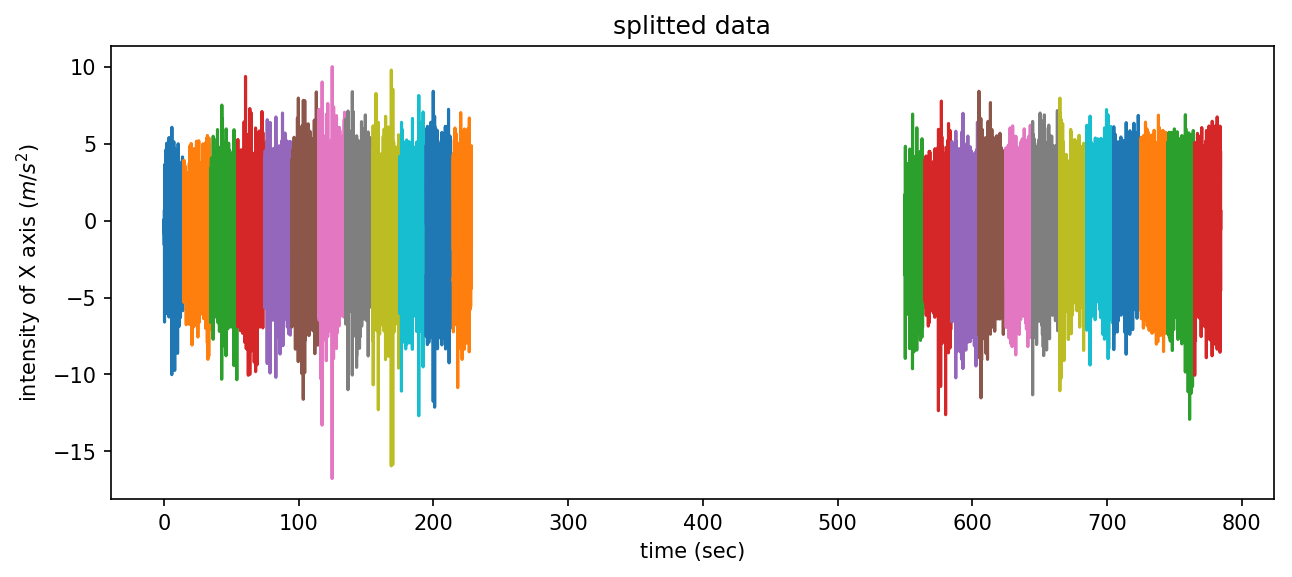

In [372]:
plt.figure(figsize=(10,4),dpi=150)
jdx = [0]+idx
i_data = []
for j in range(min(len(idx),1e9)):
    sl = slice( jdx[j]+2 ,jdx[j+1]   )
    if len(i_t[sl])<100:
        continue
    plt.plot(i_t[sl],i_x[sl])
    i_data += [ timeSeries(i_t[sl],i_x[sl],i_y[sl],i_z[sl],i_f[sl])   ]
    #y = np.abs(fft(nx[sl]/(len(nx[sl])/2)) )
    #plt.plot(y[:len(y)//2])
    #plt.show()
plt.ylabel("intensity of X axis ($m/s^2$)")
plt.xlabel("time (sec)")
plt.title("splitted data")
plt.show()

時系列と強さのグラフ，一つを取り出して見てみる

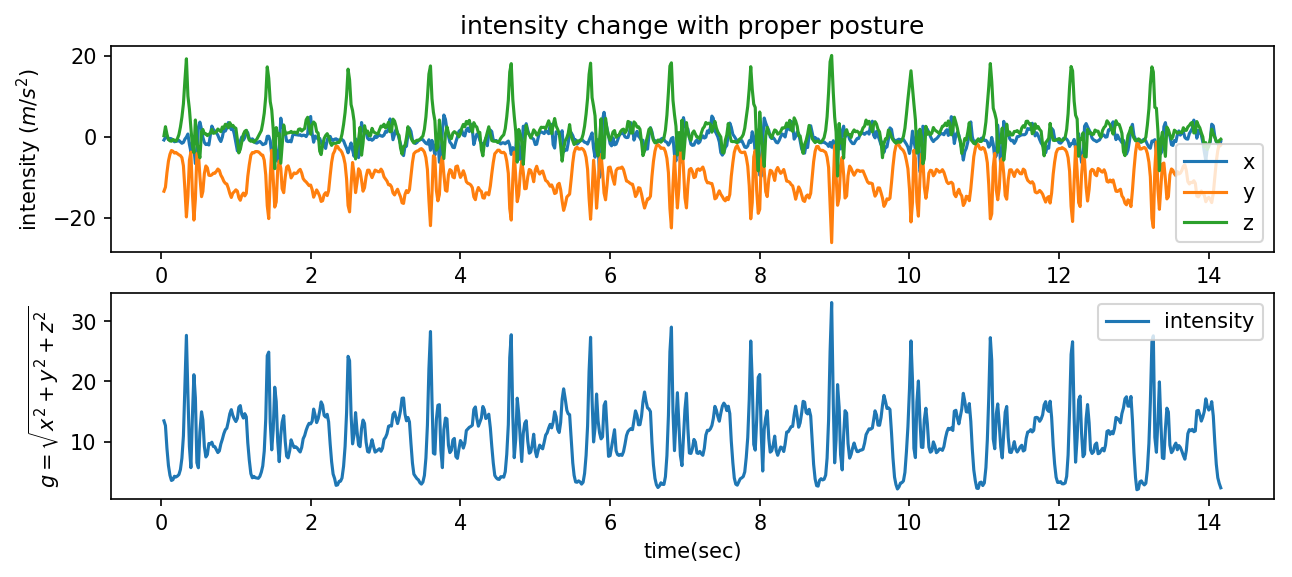

In [373]:
datum = i_data[0]

plt.figure(figsize=(10,4),dpi=150)
plt.subplot(2,1,1)
plt.title("intensity change with proper posture")
plt.plot(datum.t,datum.x,label="x")
plt.plot(datum.t,datum.y,label="y")
plt.plot(datum.t,datum.z,label="z")
plt.ylabel("intensity ($m/s^2$)")
plt.legend()
plt.subplot(2,1,2)
plt.plot(datum.t,datum.i,label="intensity")
plt.ylabel("$g=\sqrt{x^2+y^2+z^2}$")
plt.xlabel("time(sec)")
plt.legend()

plt.show()

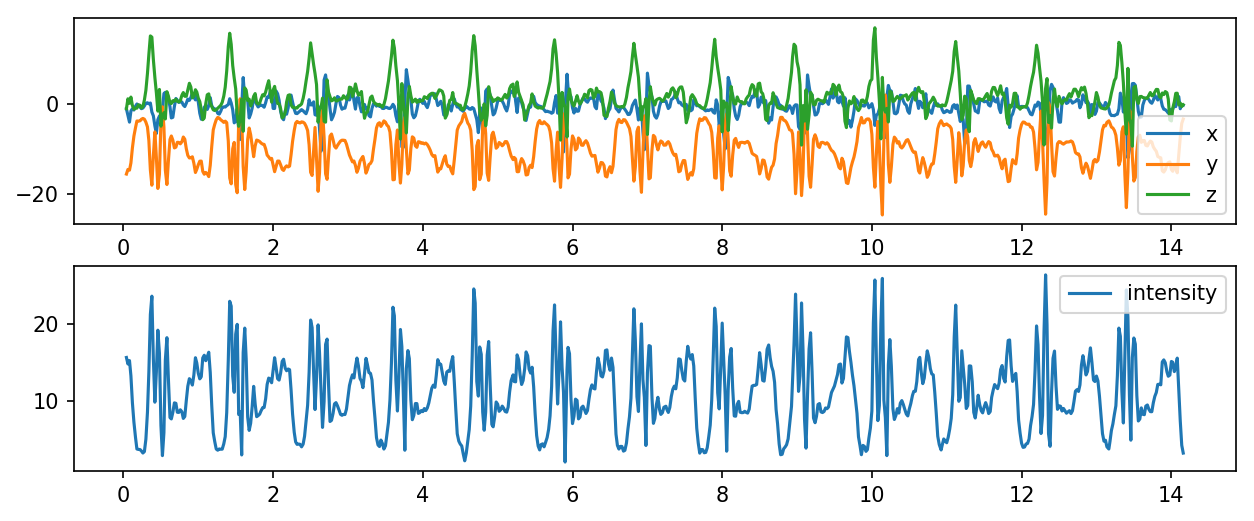

In [374]:
datum = n_data[0]

plt.figure(figsize=(10,4),dpi=150)
plt.title("intensity change with proper posture")
plt.subplot(2,1,1)
plt.plot(datum.t,datum.x,label="x")
plt.plot(datum.t,datum.y,label="y")
plt.plot(datum.t,datum.z,label="z")
plt.legend()
plt.subplot(2,1,2)
plt.plot(datum.t,datum.i,label="intensity")
plt.legend()
plt.show()

周期を取り出すためにFFTする  
参考にした  
http://ailaby.com/matplotlib_fig/
https://org-technology.com/posts/smoother.html

In [375]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

サンプリングレートが一定じゃないので，その部分を考慮して値をこねなければならない
左右の棒から内挿した

In [376]:
def my_fft(datum):
    y = datum.i
    n = datum.l
    dt = (datum.t[-1]-datum.t[0])/n
    cnt = 0
    y = []
    for i in range(n):
        while not ( datum.t[cnt]<= datum.t[0] + dt*i  < datum.t[cnt+1]):
            cnt += 1
        sa = datum.t[cnt+1]-datum.t[cnt]
        target_time = datum.t[0] + dt*i
        y += [datum.i[cnt] * (datum.t[cnt+1]-target_time)/sa  + datum.i[cnt+1] * (target_time - datum.t[cnt])/sa]
    y = np.array(y)
    t = np.array([datum.t[0] + dt*i for i in range(n)])
    yf = fftpack.fft(y)/(n/2)
    yf2 = yf.copy()

    yf2[np.abs(yf2) < max(np.abs(yf2[2:]))*0.95] = 0
    freq = fftpack.fftfreq(n,dt)
    y2 = np.real(fftpack.ifft(yf2)*n)
    max_freq = freq[np.argmax(np.abs(yf2[1:]))+1]
    
    return t,freq,yf,yf2,max_freq,n,y2

猫背データの周波数領域の可視化

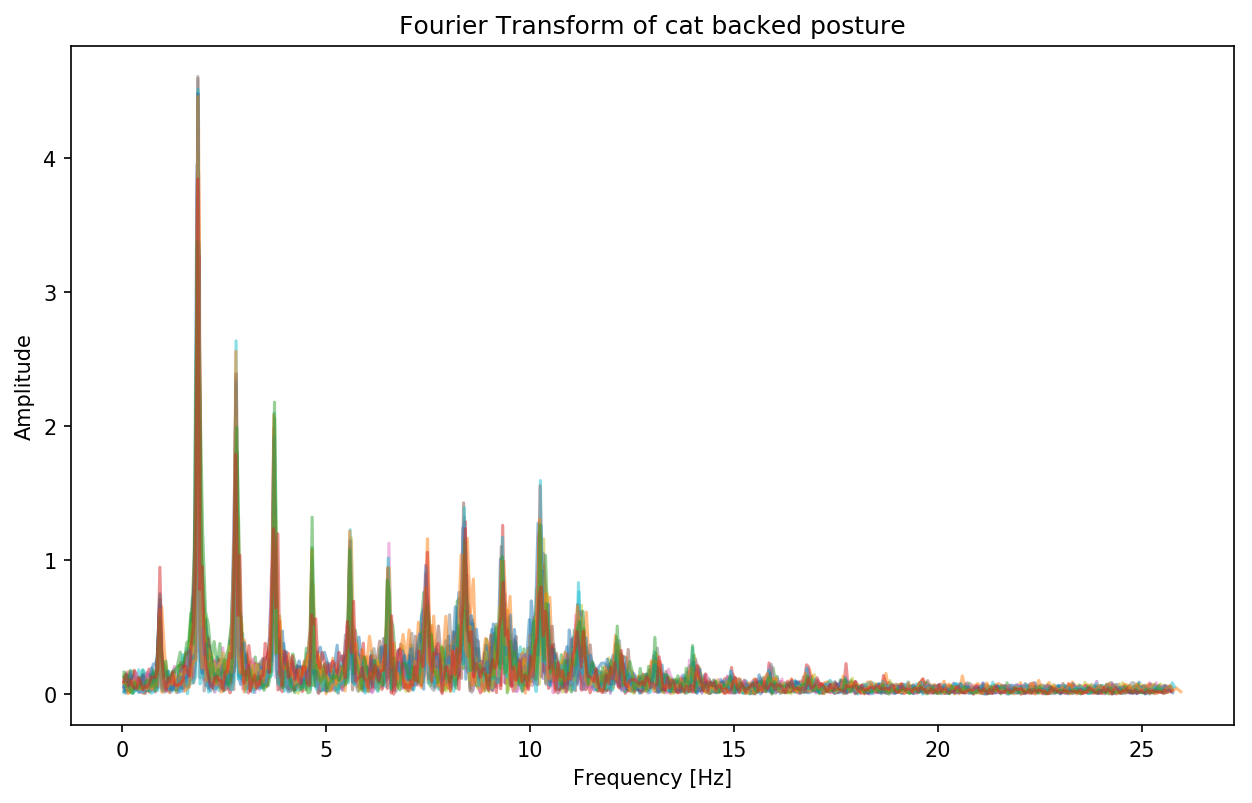

In [387]:
n_freq,n_value = [],[]
plt.figure(dpi=150,figsize=(10,6))
for datum in n_data:
    t,freq,yf,yf2,max_freq,n,y2 = my_fft(datum)
    n_freq = np.hstack((n_freq,freq[1:int(n//2)]))
    n_value = np.hstack((n_value,np.abs(yf[1:int(n//2)])))
    plt.plot(freq[1:int(n//2)], np.abs(yf[1:int(n//2)]),alpha  =0.5)
#plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
#plt.ylim([0,6])
plt.title("Fourier Transform of cat backed posture")
plt.axis("tight")
plt.show()

犬背データの可視化

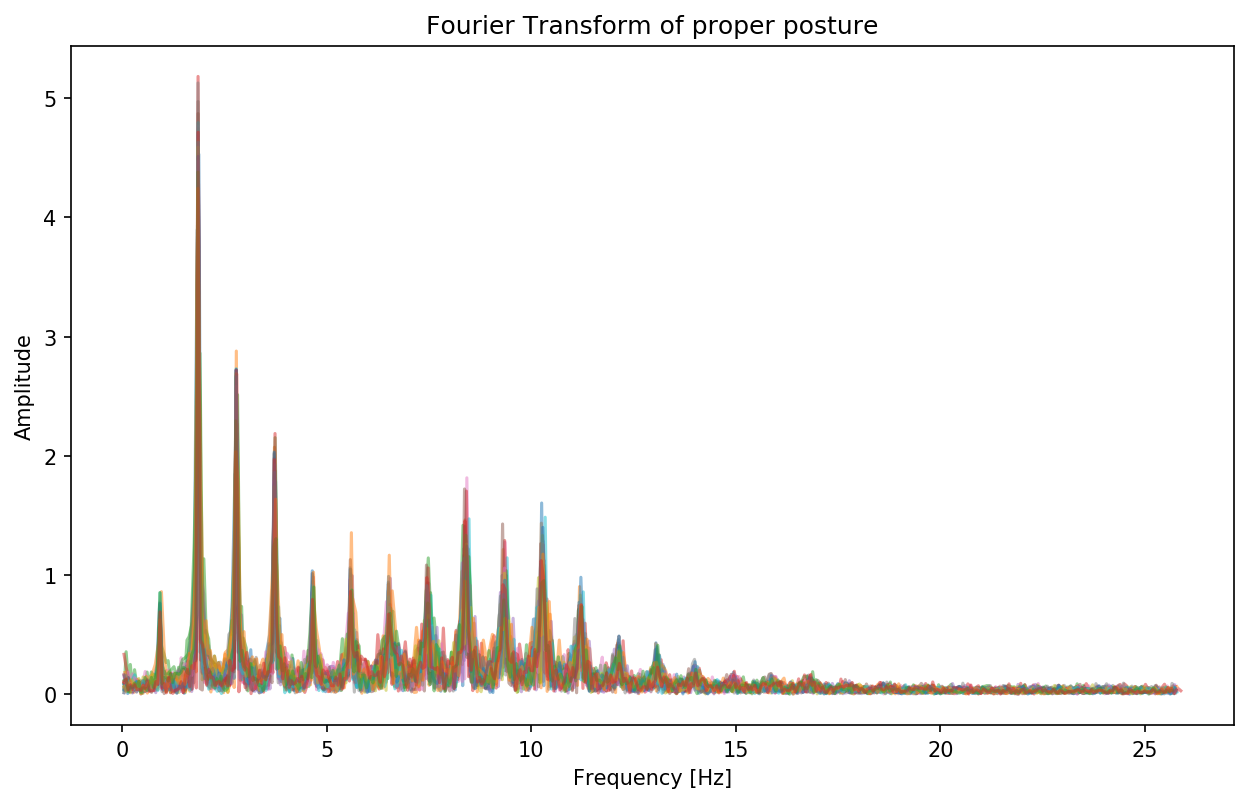

In [386]:
i_freq,i_value = [],[]
plt.figure(dpi=150,figsize=(10,6))
for datum in i_data:
    t,freq,yf,yf2,max_freq,n,y2 = my_fft(datum)
    plt.plot(freq[1:int(n//2)], np.abs(yf[1:int(n//2)]),alpha=0.5)
    i_freq = np.hstack((i_freq,freq[1:int(n//2)]))
    i_value = np.hstack((i_value,np.abs(yf[1:int(n//2)])))
    # print("datalen {}".format(len(freq[1:int(n//2)])))
#plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
#plt.ylim([0,6])
plt.axis("tight")
plt.title("Fourier Transform of proper posture")
plt.show()

In [238]:
# 下記を予めインポート
import numpy as np
import scipy as sp

import scipy.special as special
import scipy.stats as stats

import matplotlib.pyplot as plt

In [239]:
import scipy.stats as stats    
alpha = 5
loc = 100.5
beta = 22
data = stats.gamma.rvs(alpha, loc=loc, scale=beta, size=10000)    
print(data)
# [ 202.36035683  297.23906376  249.53831795 ...,  271.85204096  180.75026301
#   364.60240242]

fit_alpha, fit_loc, fit_beta=stats.gamma.fit(data)
print(fit_alpha, fit_loc, fit_beta)
# (5.0833692504230008, 100.08697963283467, 21.739518937816108)

print(alpha, loc, beta)
# (5, 100.5, 22)

[195.1575428  193.38786971 214.95732089 ... 202.75686101 228.82235215
 172.58587792]
4.916877836443643 102.08709541014736 22.184035908452067
5 100.5 22


In [240]:
from mpl_toolkits.mplot3d import Axes3D

犬背での推定

In [389]:
window_size = 0.1
acc = []
start = 0
i_means = []
for a,b in sorted([(a,b) for a,b in zip(i_freq,i_value)]):
    if a > start+window_size :
        # fittingを実行
        # 最尤推定した形状パラメータ(a), 位置パラメータ, スケールパラメータ(b)を返す
        xs = np.linspace(0.00,max(acc),1000)
        a_hat, loc_hat, scale_hat = stats.gamma.fit(acc)
        ps_hat = stats.gamma.pdf(xs, a_hat, loc=loc_hat, scale=scale_hat)
        i_means += [(start+window_size/2,acc,a_hat, loc_hat, scale_hat)]
        # 確率分布およびヒストグラムをプロット
        if False:
            fig = plt.figure(1, figsize=(12, 8))
            ax = fig.add_subplot(111)
            ax.plot(xs, ps_hat, 'g-', lw=2, label='fitted pdf')

            nbins = 100
            ax.hist(acc,density=True, histtype='stepfilled', alpha=0.2, bins=nbins)
            ax.legend(loc='best', frameon=False)

            ax.grid(True)
            plt.show()
        #print("a_hat: {0}, loc_hat: {1}, scale_hat: {2}".format(a_hat, loc_hat, scale_hat))
        #break
        
        acc = []
        start += window_size
    else:
        acc += [b]

猫背での推定

In [390]:
window_size = 0.1
acc = []
start = 0
n_means = []
for a,b in sorted([(a,b) for a,b in zip(n_freq,n_value)]):
    if a > start+window_size :
        # fittingを実行
        # 最尤推定した形状パラメータ(a), 位置パラメータ, スケールパラメータ(b)を返す
        xs = np.linspace(0.00,max(acc),1000)
        a_hat, loc_hat, scale_hat = stats.gamma.fit(acc)
        ps_hat = stats.gamma.pdf(xs, a_hat, loc=loc_hat, scale=scale_hat)
        n_means += [(start+window_size/2,acc,a_hat, loc_hat, scale_hat)]
        # 確率分布およびヒストグラムをプロット
        if False:
            fig = plt.figure(1, figsize=(12, 8))
            ax = fig.add_subplot(111)
            ax.plot(xs, ps_hat  , 'g-', lw=2, label='fitted pdf')

            nbins = 100
            ax.hist(acc,density=True, histtype='stepfilled', alpha=0.2, bins=nbins)
            ax.legend(loc='best', frameon=False)

            ax.grid(True)
            plt.show()
        #print("a_hat: {0}, loc_hat: {1}, scale_hat: {2}".format(a_hat, loc_hat, scale_hat))
        #break
        
        acc = []
        start += window_size
    else:
        acc += [b]

/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:410: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


適当なデータに対してFFTとフィルタリング舌波形に対して逆FFTすることで，ゲインの一番大きい周期があっているかを確認する

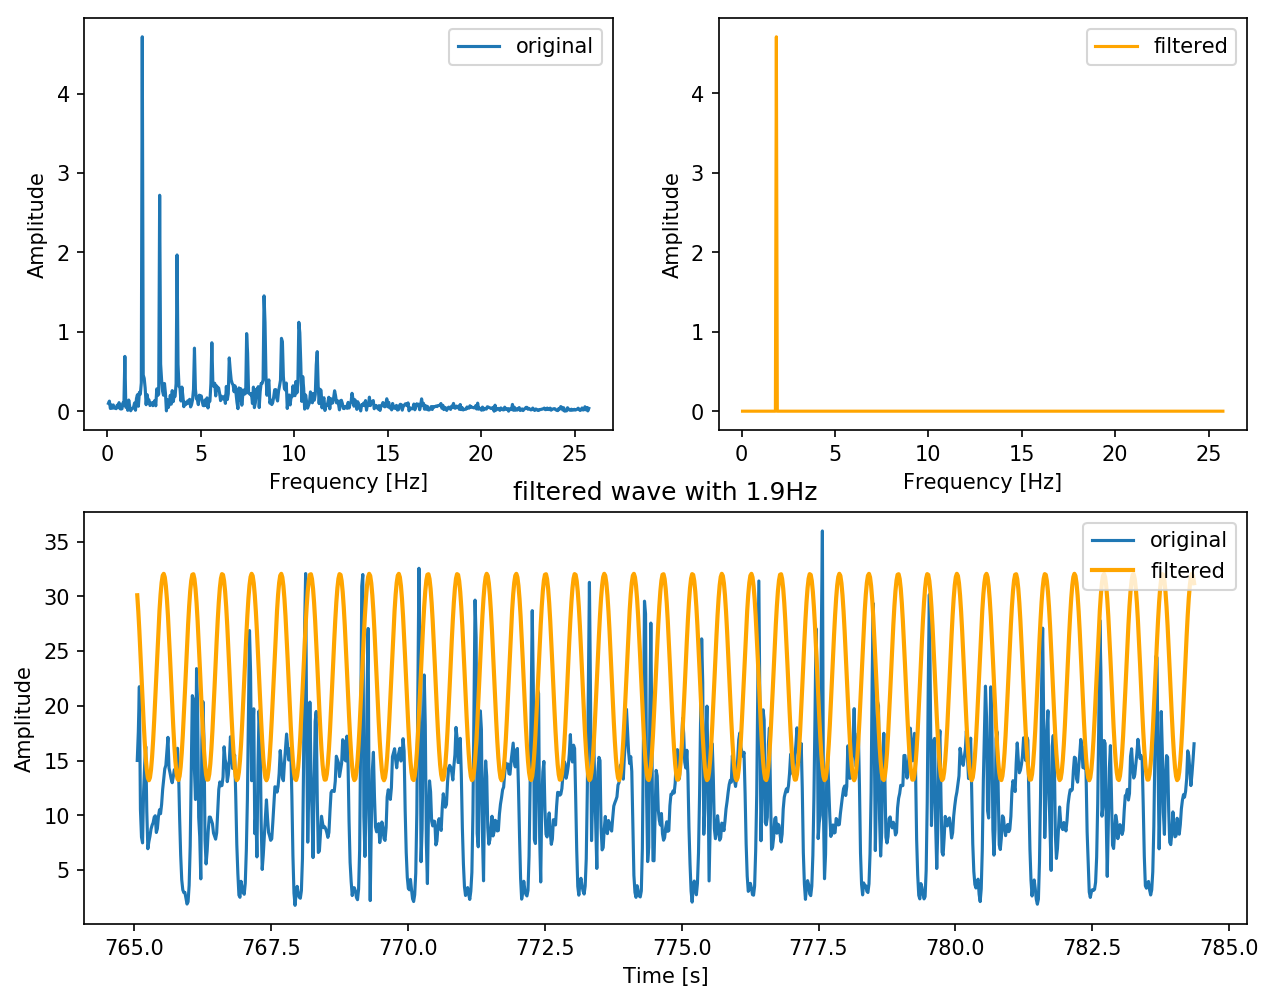

In [243]:
# rfft 関数を使う場合には yf, y2 は以下のように求まる
# rfft はナイキスト周波数以上の帯域を計算しないため負荷が軽い
# yf = fftpack.rfft(y)/(n/2)
# y2 = fftpack.irfft(yf2)*(n/2)
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,2)

# プロット
plt.figure(dpi=150,figsize=(10,8))
plt.subplot(gs[0,0])
plt.plot(freq[1:int(n//2)], np.abs(yf[1:int(n//2)]),label="original")
plt.legend()
#plt.xscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.axis("tight")

plt.subplot(gs[0,1])
plt.plot(freq[1:int(n/2)], np.abs(yf2[1:int(n/2)]),label="filtered",c="orange")
plt.xlabel("Frequency [Hz]")
#plt.xscale("log")
plt.ylabel("Amplitude")
plt.legend()
plt.axis("tight")

plt.subplot(gs[1,:])
plt.plot(t, datum.i, label="original")
plt.plot(t, y2, c="orange", linewidth=2, label="filtered")
plt.axis("tight")
plt.legend(loc="upper right")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("filtered wave with {:.1f}Hz".format(max_freq))
plt.show()

適切な窓サイズで取り出しを試みる

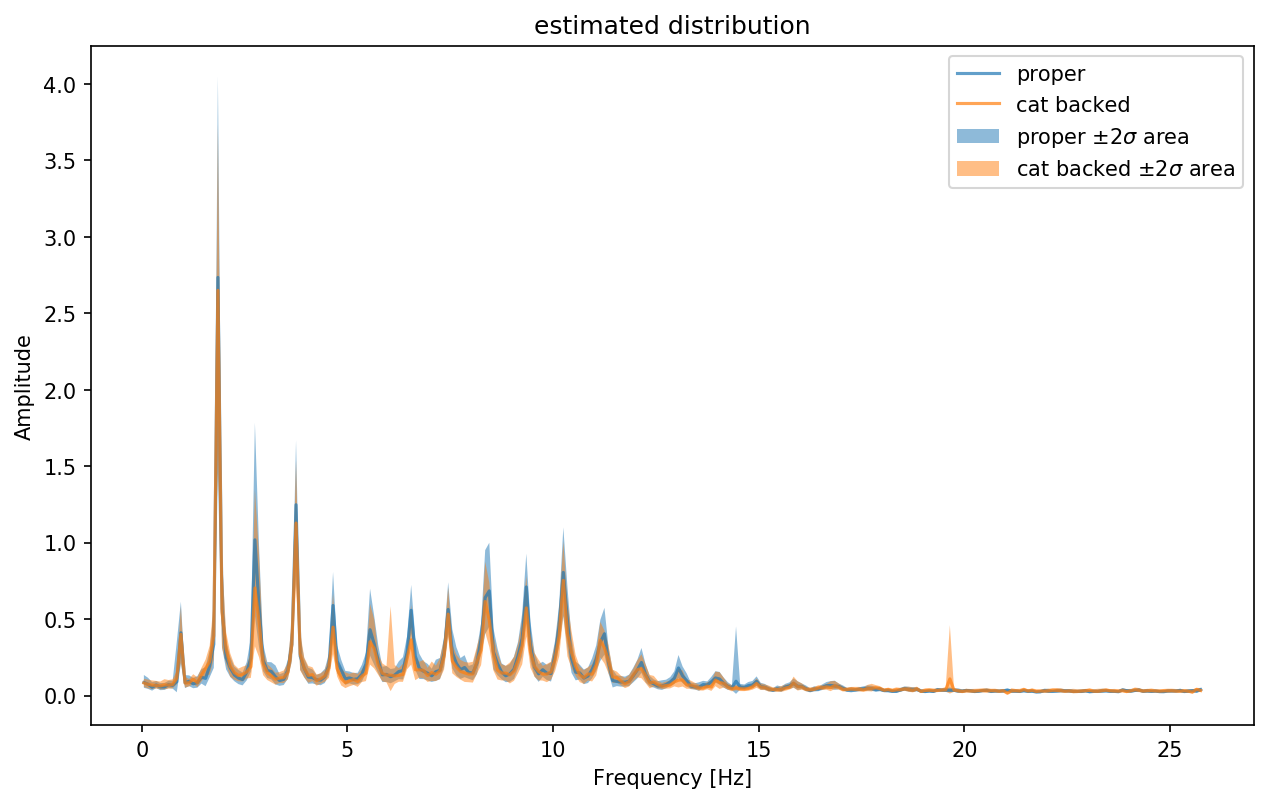

In [419]:
plt.figure(dpi=150,figsize=(10,6))
o1,o,o2 =[],[],[]
m = []
for (mid,acc,a_hat, loc_hat, scale_hat) in i_means:
    m += [mid]
    o1 += [stats.gamma.ppf(0.25, a_hat, loc=loc_hat, scale=scale_hat)]
    o += [stats.gamma.ppf(0.50, a_hat, loc=loc_hat, scale=scale_hat)]
    o2 += [stats.gamma.ppf(0.75, a_hat, loc=loc_hat, scale=scale_hat)]
plt.plot(m,o,label="proper",alpha=0.7)
plt.fill_between(m,o1,o2,label=r'proper $\pm2\sigma$ area',alpha=0.5)
#plt.show()

#plt.figure(dpi=150,figsize=(10,6))
o1,o,o2 =[],[],[]
m = []
for (mid,acc,a_hat, loc_hat, scale_hat) in n_means:
    m += [mid]
    o1 += [stats.gamma.ppf(0.25, a_hat, loc=loc_hat, scale=scale_hat)]
    o += [stats.gamma.ppf(0.50, a_hat, loc=loc_hat, scale=scale_hat)]
    o2 += [stats.gamma.ppf(0.75, a_hat, loc=loc_hat, scale=scale_hat)]
plt.plot(m,o,label="cat backed",alpha=0.7)

plt.fill_between(m,o1,o2,alpha=0.5,label=r'cat backed $\pm2\sigma$ area')

plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.legend()

plt.title("estimated distribution")
plt.show()

# テストデータの取り出し，検証

In [244]:
window_size = 1
step_time = 2 #/max_freq 
two_step_time = step_time * window_size

In [245]:
using_i_data = []
for datum in i_data:
    start = datum.t[0]
    t = datum.t
    start_idx = 0
    for idx,time in enumerate(t):
        if time - start > two_step_time:
            sl = slice(start_idx,idx)
            using_i_data += [timeSeries(t[sl],datum.x[sl],datum.y[sl],datum.z[sl],datum.f[sl])]

            start = t[idx]
            start_idx += 1
using_n_data = []
for datum in n_data:
    start = datum.t[0]
    t = datum.t
    start_idx = 0
    for idx,time in enumerate(t):
        if time - start > two_step_time:
            sl = slice(start_idx,idx)
            using_n_data += [timeSeries(t[sl],datum.x[sl],datum.y[sl],datum.z[sl],datum.f[sl])]
            start = t[idx]
            start_idx += 1

In [246]:
test_data = []
with open(test_filename) as f:
    test_data += f.readlines()[300:-100]

df_test = pd.DataFrame(
    [ (lambda line : 
       (*line.rstrip().split("\t"),deltaSeconds(line.split("\t")[0])-deltaSeconds(test_data[0].split("\t")[0])))(line) 
     for line in test_data],columns=["Time","X","Y","Z","Flag","DeltaSec"])
df_test.head()


,Time,X,Y,Z,Flag,DeltaSec
0,20190609154817.584,-1.446203,-9.916879,-0.308574,0,0.000
1,20190609154817.605,-1.172919,-10.037930,-0.323964,0,0.021
2,20190609154817.625,-1.210441,-9.902840,-0.251353,0,0.041
3,20190609154817.645,-1.519293,-9.912569,0.008112,0,0.061
4,20190609154817.666,-1.455215,-9.925795,0.165047,0,0.082


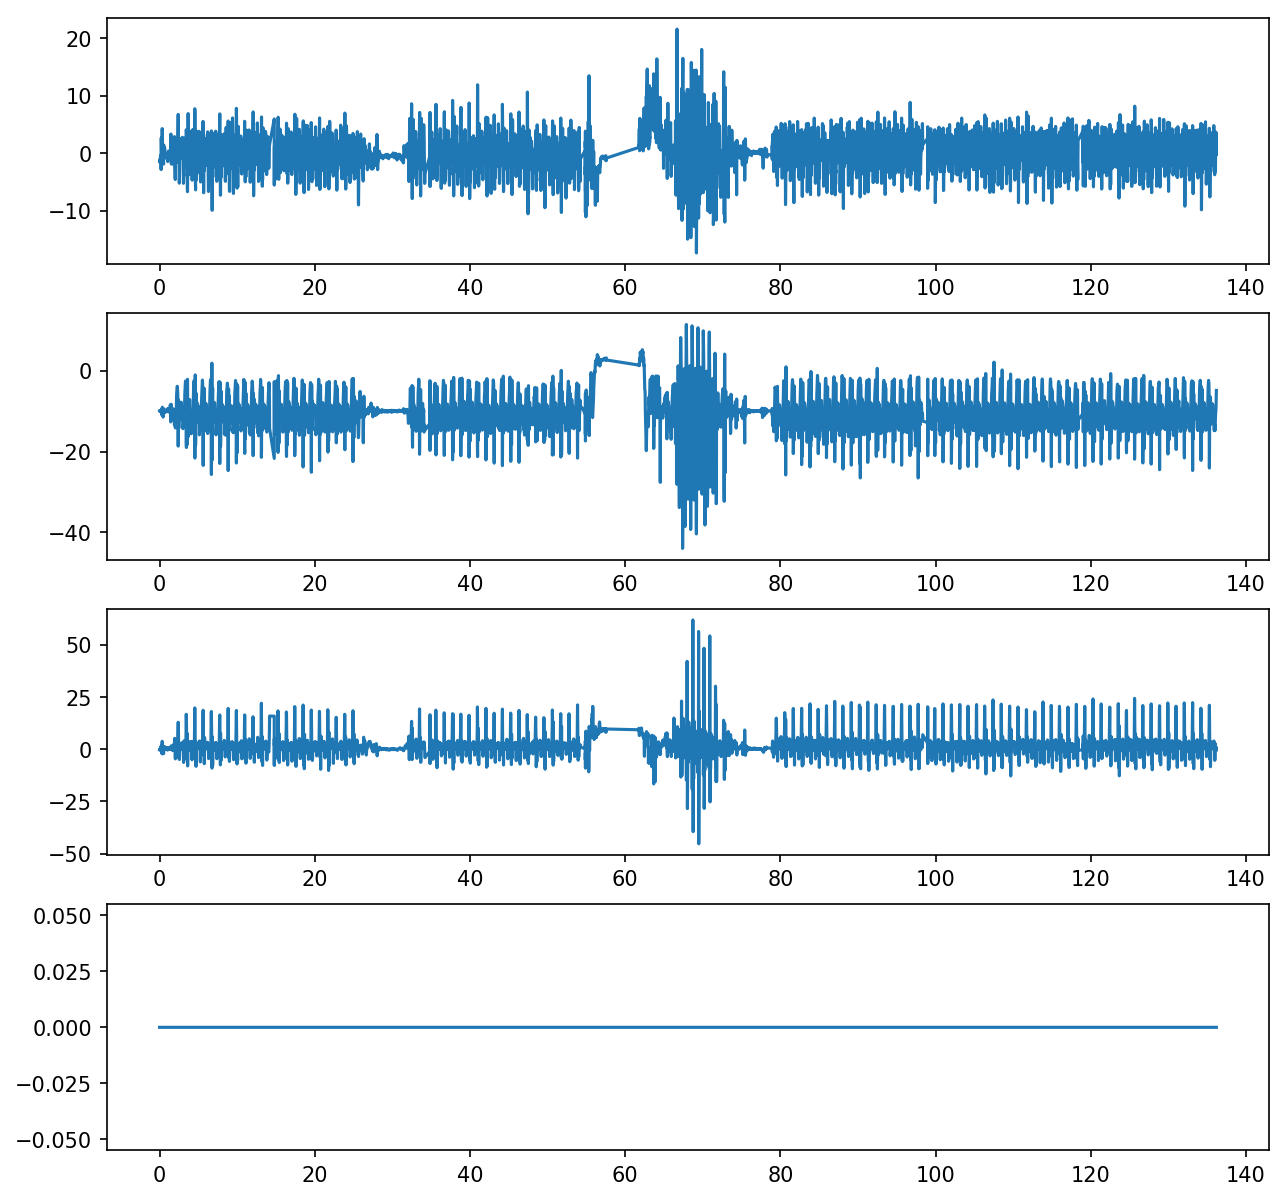

In [247]:
plt.figure(dpi=150,figsize=(10,10))
sl = slice(df_test.size)
t_t = df_test.DeltaSec.to_numpy().astype(float)[sl]
t_f = df_test.Flag.to_numpy().astype(int)[sl]
t_x = df_test.X.to_numpy().astype(float)[sl]
t_y = df_test.Y.to_numpy().astype(float)[sl]
t_z = df_test.Z.to_numpy().astype(float)[sl]
plt.subplot(4, 1, 1)
plt.plot(t_t,t_x)
plt.subplot(4, 1, 2)
plt.plot(t_t,t_y)

plt.subplot(4, 1, 3)
plt.plot(t_t,t_z)

plt.subplot(4, 1, 4)
plt.plot(t_t,t_f)
plt.show()

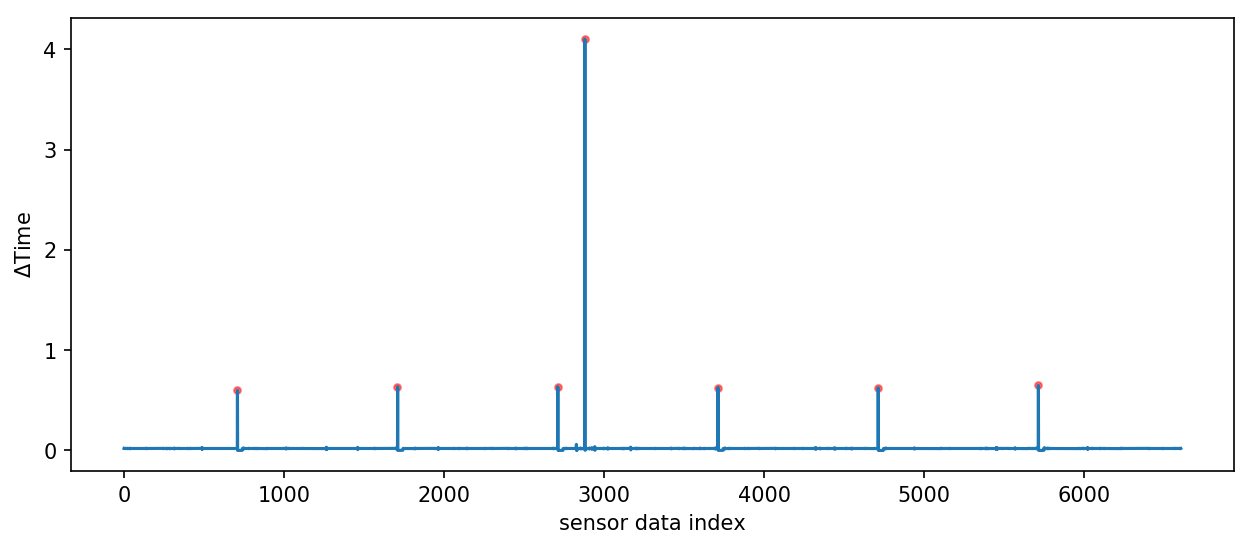

In [476]:
plt.figure(dpi=150,figsize=(10,4))

threshold = 0.2

idx = [ i-1  for i in range(len(t_t)-1)  if t_t[i+1]-t_t[i]>threshold]
numbers = [ t_t[i+1]-t_t[i]  for i in range(len(t_t)-1)  if t_t[i+1]-t_t[i]>threshold]

plt.scatter(idx,numbers,color="r",alpha=0.5,s=10)
plt.plot([ t_t[i+1]-t_t[i]  for i in range(len(t_t)-1)])
plt.xlabel("sensor data index")
plt.ylabel("$\Delta$Time")
plt.show()

振幅のみを見てみる

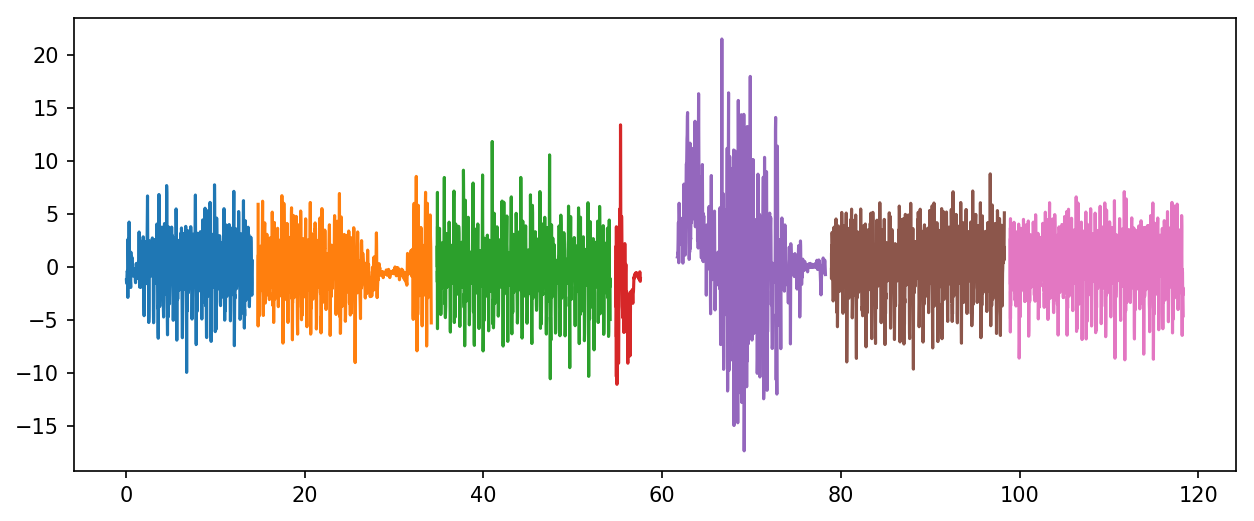

In [477]:
plt.figure(figsize=(10,4),dpi=150)
jdx = [0]+idx
t_data = []
for j in range(min(len(idx),1e9)):
    sl = slice( jdx[j]+2 ,jdx[j+1]   )
    if len(t_t[sl])<100:
        continue
    plt.plot(t_t[sl],t_x[sl])
    t_data += [ timeSeries(t_t[sl],t_x[sl],t_y[sl],t_z[sl],t_f[sl])   ]
    #y = np.abs(fft(nx[sl]/(len(nx[sl])/2)) )
    #plt.plot(y[:len(y)//2])
    #plt.show()
plt.show()
t_data = t_data[-1:]

一つを取り出して可視化

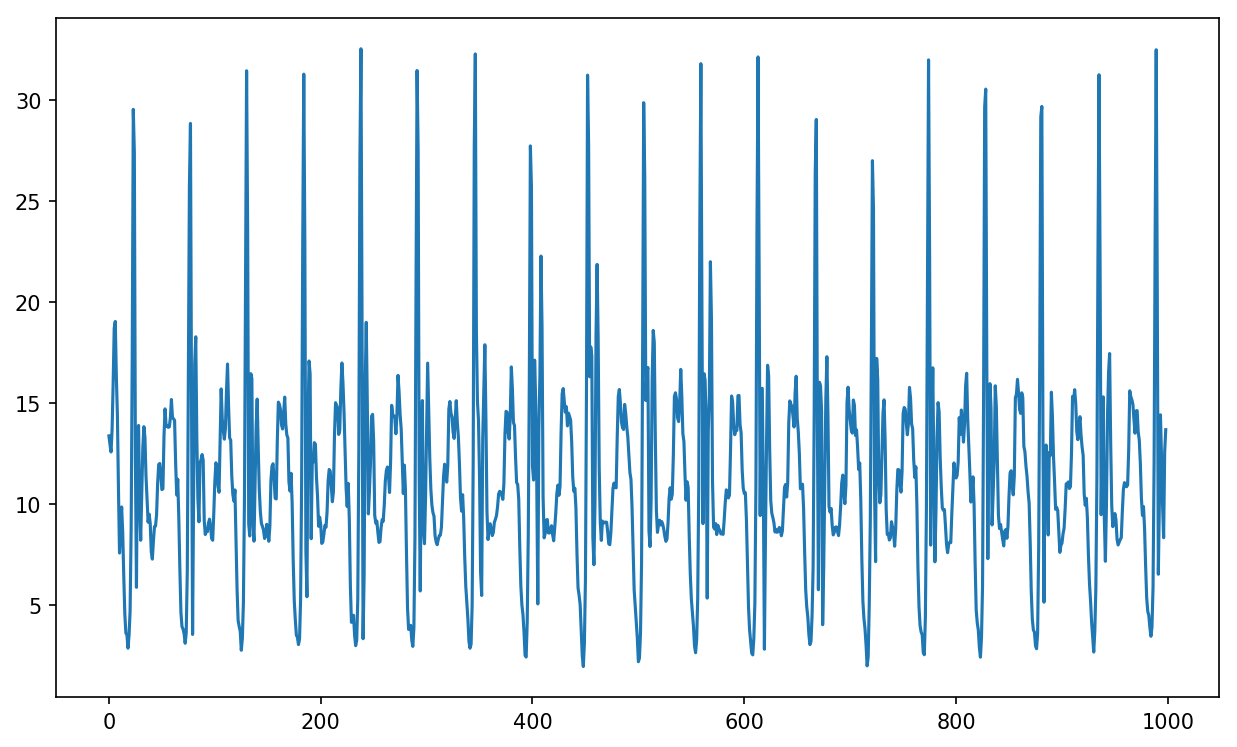

In [480]:
plt.figure(figsize=(10,6),dpi=150)
plt.plot(t_data[0].i)
plt.show()

In [481]:
window_size = 4
step_time = 1 /max_freq 
two_step_time = step_time * window_size

In [482]:
time

118.3219997882843

後ろの二区分しか使いものにならないのでそこを取り出す

In [483]:
using_t_data = []
for datum in t_data:
    start = datum.t[0]
    t = datum.t
    start_idx = 0
    for idx,time in enumerate(t):
        if time - start > two_step_time:
            sl = slice(start_idx,idx)
            # plt.plot(t[sl],datum.x[sl])
            
            using_t_data += [timeSeries(t[sl],datum.x[sl],datum.y[sl],datum.z[sl],datum.f[sl])]
            start_idx += 1
            start = t[start_idx]

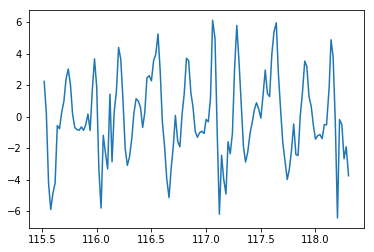

In [484]:
plt.plot(t[sl],datum.x[sl])

In [485]:
len(using_t_data)

859

テストデータでフーリエ変換しなければならない

In [492]:
t_freq,t_value = [],[]
ave = []
for datum in using_t_data:
    t,freq,yf,yf2,max_freq,n,y2 = my_fft(datum)
    
    t_freq = np.hstack((t_freq,freq[1:int(n//2)]))
    t_value = np.hstack((t_value,np.abs(yf[1:int(n//2)])))
    
    # データに対して，取得したfreqの話をする
    pn = []
    pi = []
    for fr,val in zip(freq[1:int(n//2)] ,np.abs(yf[1:int(n//2)])):
        for mid ,acc,a_hat, loc_hat, scale_hat in i_means:
            if mid -0.15 < fr  < mid+ 0.15:
                score = stats.gamma.pdf(fr, a_hat, loc=loc_hat, scale=scale_hat)
                pi += [score] 
                #print(fr,val,stats.gamma.pdf(fr, a_hat, loc=loc_hat, scale=scale_hat))
        
        for mid ,acc,a_hat, loc_hat, scale_hat in n_means:
            if mid -0.15 < fr  < mid+ 0.15:
                score = stats.gamma.pdf(fr, a_hat, loc=loc_hat, scale=scale_hat)
                pn += [score]  
                #print(fr,val,stats.gamma.pdf(fr, a_hat, loc=loc_hat, scale=scale_hat))
    ave += [(datum.t[0],np.average([(ppi)/(ppi+ppn) if ppi+ppn > 0 else 0.5 for ppi,ppn in zip (pi,pn) ]))]

位置と時間の長さの表示

In [494]:
ave

[(98.96499991416931, 0.47046202484351585),
 (98.9670000076294, 0.4910612194208963),
 (98.96799993515015, 0.49999829182383604),
 (98.96999979019165, 0.49677404379253237),
 (98.97099995613098, 0.5021482430411328),
 (98.97199988365173, 0.4961184236731799),
 (98.97299981117249, 0.49420013640536226),
 (98.97499990463257, 0.48025483385304313),
 (98.97599983215332, 0.4564679511747153),
 (98.97699999809265, 0.4919992219891957),
 (98.9779999256134, 0.5170091387185911),
 (98.97899985313416, 0.49235894504757965),
 (98.97999978065491, 0.5059525411134765),
 (98.97999978065491, 0.5005823256032784),
 (98.98099994659424, 0.4690659756911021),
 (98.98099994659424, 0.4674062323158317),
 (98.98199987411499, 0.4991355127324283),
 (98.98299980163574, 0.50173390043004),
 (98.98299980163574, 0.5039052657984733),
 (98.98399996757507, 0.49135959722150574),
 (98.98399996757507, 0.4962798148049401),
 (98.98499989509583, 0.488011946023291),
 (98.98599982261658, 0.5028696479586038),
 (98.98599982261658, 0.505386714

推定

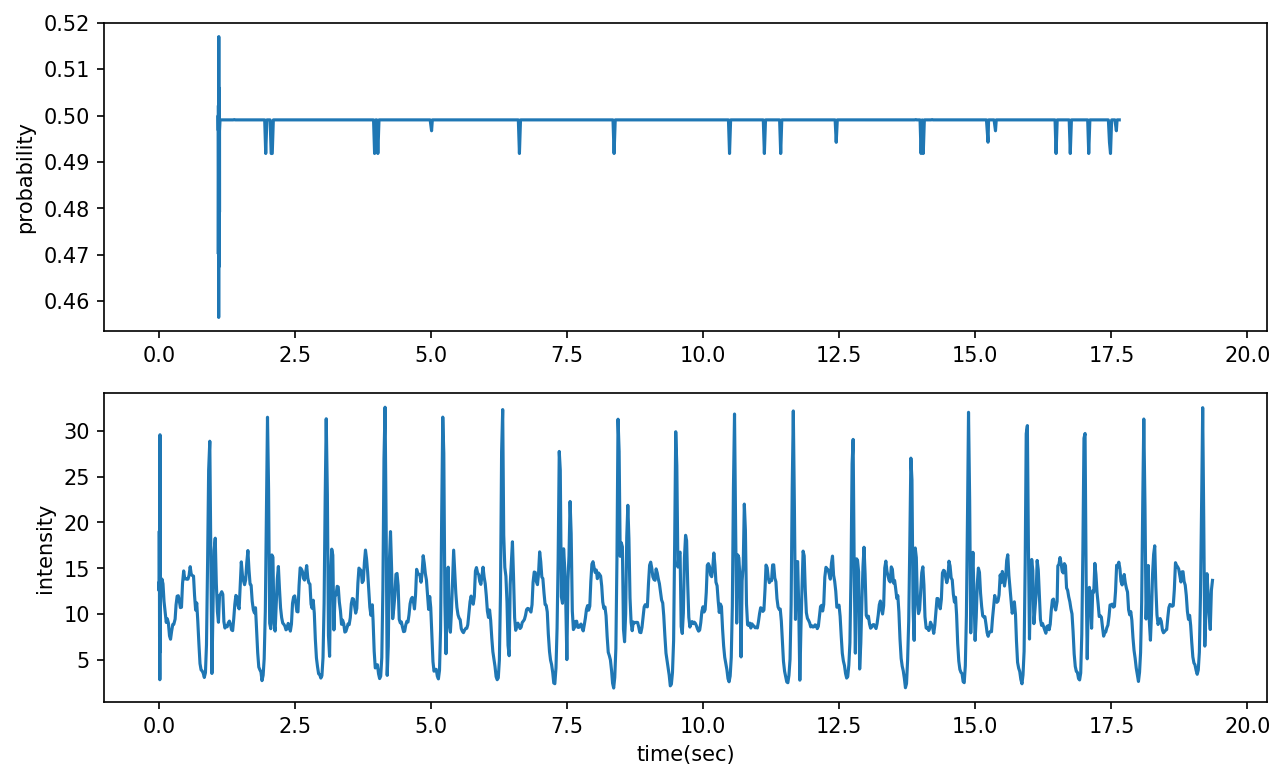

In [518]:
plt.figure(figsize=(10,6),dpi=150)
plt.title("estimation")
plt.subplot(2, 1, 1)
t = [a+two_step_time/2-ave[0][0] for a,b in ave]
v = [b for a,b in ave]
t2,v2 = [a-t_data[0].t[0] for a in t_data[0].t],t_data[0].i


plt.plot(t,v)
plt.xlim([min(min(t),min(t2))-1,max(max(t),max(t2))+1])
plt.ylabel("probability")

plt.subplot(2, 1, 2)
plt.plot(t2,v2)
plt.xlim([min(min(t),min(t2))-1,max(max(t),max(t2))+1])
plt.xlabel("time(sec)")
plt.ylabel("intensity")
plt.show()